# Binary Classification Using CNN


In [1]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 14.5 MB/s eta 0:00:00


In [12]:
import zipfile
import os

with_mask_zip = '/content/with_mask.zip'
without_mask_zip = '/content/without_mask.zip'
extracted_path = '/content/extracted_files'
with_mask_path = '/content/extracted_files/with_mask/with_mask'
without_mask_path = '/content/extracted_files/without_mask/without_mask'

# Create the extracted_files directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Function to extract zip files and manage folder structure
def extract_and_organize(zip_path, target_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

    # Handle nested folder structure if needed
    extracted_folder = os.path.join(extracted_path, os.path.basename(zip_path).split('.')[0])
    target_path = os.path.join(extracted_path, target_folder)


# Extract files and organize paths
extract_and_organize(with_mask_zip, 'with_mask/with_mask')
extract_and_organize(without_mask_zip, 'without_mask/without_mask')

print("✅ Files extracted successfully and folder structure organized!")


OSError: [Errno 22] Invalid argument: '/content/extracted_files/without_mask/without_mask' -> '/content/extracted_files/without_mask/without_mask/without_mask'

In [ ]:
import os
import zipfile
import numpy as np
import cv2
from tqdm import tqdm

# Extract zip files
with_mask_zip = '/content/with_mask.zip'
without_mask_zip = '/content/without_mask.zip'

extracted_path = '/content/extracted_files'
with_mask_path = '/content/extracted_files/with_mask/with_mask'
without_mask_path = '/content/extracted_files/without_mask/without_mask'

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_path)

# Extract both zip files
extract_zip(with_mask_zip, with_mask_path)
extract_zip(without_mask_zip, without_mask_path)

# Calculate dataset mean and std for normalization
def calculate_mean_std(paths):
    sum_mean = np.zeros(3, dtype=np.float64)
    sum_std = np.zeros(3, dtype=np.float64)
    count = 0

    print("Calculating dataset mean and std...")
    for class_path in paths:
        if not os.path.exists(class_path):
            print(f"Directory not found: {class_path}")
            continue

        image_paths = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

        # Process images in batches with tqdm
        for img_path in tqdm(image_paths, desc=f"Processing {os.path.basename(class_path)}"):
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping invalid image: {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (128, 128))
            img = img.astype(np.float32) / 255.0

            # Update running statistics
            img_mean = img.mean(axis=(0, 1))
            img_std = img.std(axis=(0, 1))

            sum_mean += img_mean
            sum_std += img_std
            count += 1

    if count == 0:
        print("No valid images were processed.")
        return np.array([0, 0, 0]), np.array([0, 0, 0])

    mean = sum_mean / count
    std = sum_std / count

    return mean.astype(np.float32), std.astype(np.float32)

# Calculate mean and std for both directories
mean, std = calculate_mean_std([with_mask_path, without_mask_path])
print(f"Dataset mean: {mean}")
print(f"Dataset std: {std}")


Calculating dataset mean and std...


Processing without_mask: 100%|██████████| 1930/1930 [00:03<00:00, 619.37it/s]

Dataset mean: [0.57503885 0.4976267  0.4670749 ]
Dataset std: [0.2561455  0.24194087 0.23386483]


In [19]:
!pip install tensorflow opencv-python numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 586.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00


In [24]:
import os
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 65s 555ms/step - accuracy: 0.9167 - loss: 0.2066 - val_accuracy: 0.9646 - val_loss: 0.3103 - learning_rate: 5.0000e-04
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 511ms/step - accuracy: 0.9810 - loss: 0.0558 - val_accuracy: 0.9878 - val_loss: 0.1276 - learning_rate: 5.0000e-04
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 503ms/step - accuracy: 0.9923 - loss: 0.0202 - val_accuracy: 0.9878 - val_loss: 0.1941 - learning_rate: 5.0000e-04
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 506ms/step - accuracy: 0.9945 - loss: 0.0170 - val_accuracy: 0.9866 - val_loss: 0.2447 - learning_rate: 5.0000e-04
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 504ms/step - accuracy: 0.9889 - loss: 0.0318 - val_accuracy: 0.9939 - val_loss: 0.1178 - learning_rate: 5.0000e-04
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 507ms/step - accuracy: 0.9858 - loss: 0.0300 - val_accuracy: 0.9951 - val_loss: 0.1559 - learning_rate: 5.0000e-04
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 503ms/step - 

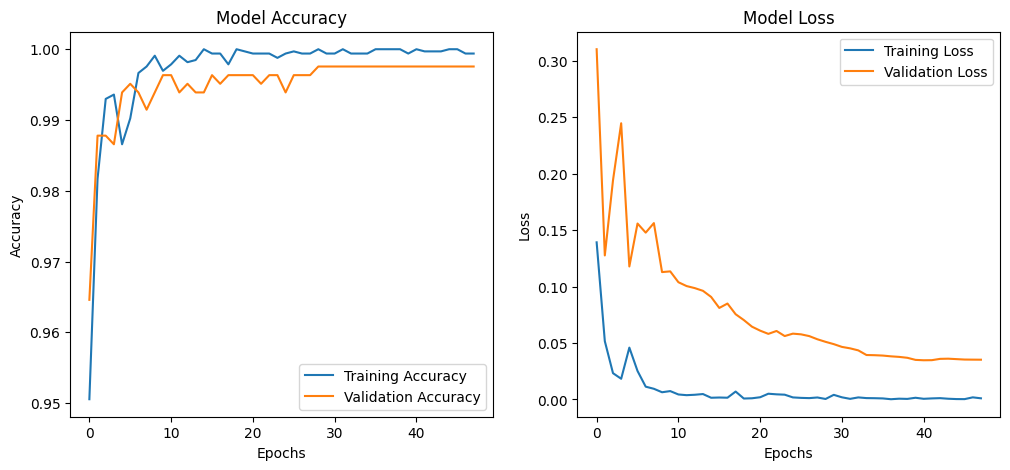

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step


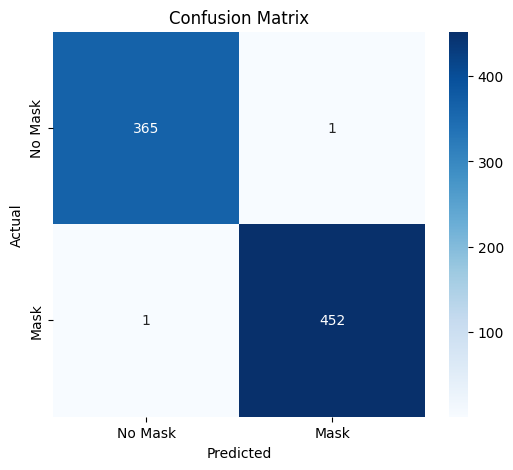

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       453

    accuracy                           1.00       819
   macro avg       1.00      1.00      1.00       819
weighted avg       1.00      1.00      1.00       819



In [25]:
# Constants
IMG_SIZE = 96
BATCH_SIZE = 32
LEARNING_RATE = 0.0005
EPOCHS = 50

# Load data
def load_data(paths, labels):
    data, target = [], []
    for path, label in zip(paths, labels):
        for file in os.listdir(path):
            img = cv2.imread(os.path.join(path, file))
            if img is not None:
                data.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 127.5 - 1.0)
                target.append(label)
    return np.array(data), to_categorical(target)

X, y = load_data(['/content/extracted_files/with_mask/with_mask', '/content/extracted_files/without_mask/without_mask'], [1, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.1,
                             zoom_range=0.1, horizontal_flip=True,
                             fill_mode='nearest')
datagen.fit(X_train)

# Model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:-30]:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Compute class weights
class_weight_dict = dict(enumerate(compute_class_weight('balanced',
                            classes=np.unique(np.argmax(y, axis=1)),
                            y=np.argmax(y, axis=1))))

# Callbacks
callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6)
]

# Training
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    class_weight=class_weight_dict,
                    callbacks=callbacks)

# Plotting Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))

In [4]:
# Extract zip files
with_mask_zip = '/content/with_mask.zip'
without_mask_zip = '/content/without_mask.zip'
extracted_path = '/content/extracted_files'
with_mask_path = '/content/extracted_files/with_mask/with_mask'
without_mask_path = '/content/extracted_files/without_mask/without_mask'



In [7]:
!pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 680ms/step - accuracy: 0.6937 - loss: 1.3580 - val_accuracy: 0.9559 - val_loss: 0.7167 - learning_rate: 3.0000e-04
Epoch 2/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 628ms/step - accuracy: 0.9400 - loss: 0.7637 - val_accuracy: 0.9916 - val_loss: 0.6534 - learning_rate: 3.0000e-04
Epoch 3/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 594ms/step - accuracy: 0.9738 - loss: 0.6513 - val_accuracy: 0.9769 - val_loss: 0.7064 - learning_rate: 3.0000e-04
Epoch 4/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 595ms/step - accuracy: 0.9779 - loss: 0.6372 - val_accuracy: 0.9643 - val_loss: 0.7587 - learning_rate: 3.0000e-04
Epoch 5/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 592ms/step - accuracy: 0.9800 - loss: 0.6243 - val_accuracy: 0.9790 - val_loss: 0.6889 - learning_rate: 3.0000e-04
Epoch 6/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 36s 594ms/step - accuracy: 0.9775 - loss: 0.6129 - val_accuracy: 0.9685 - val_loss: 0.6992 - learning_rate: 1.2000e-04


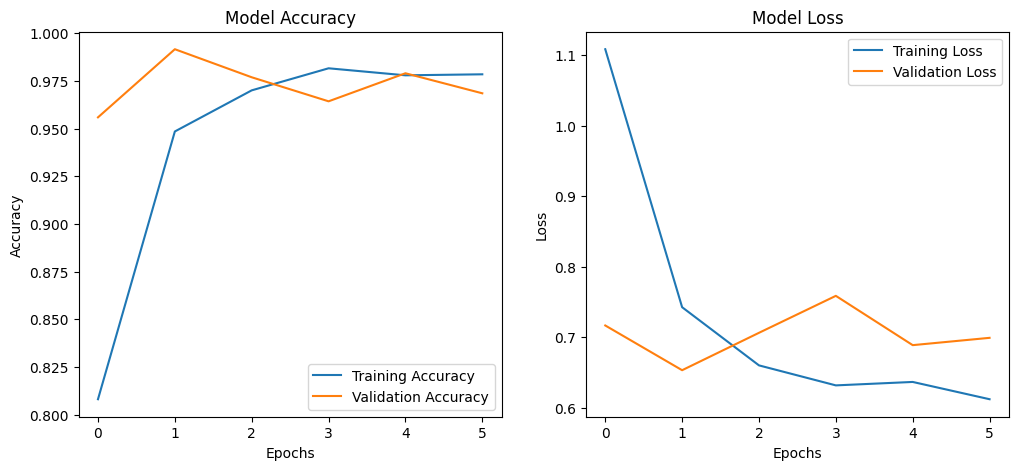

15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step


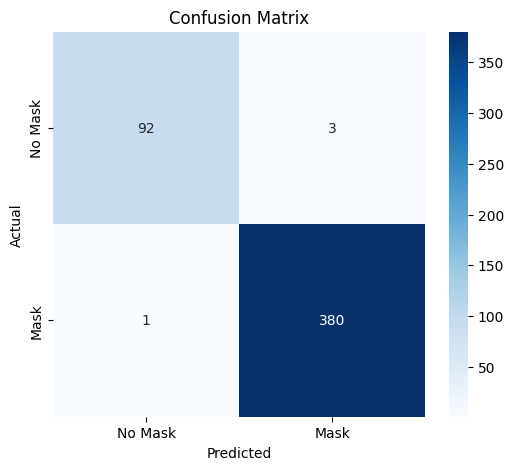

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        95
           1       0.99      1.00      0.99       381

    accuracy                           0.99       476
   macro avg       0.99      0.98      0.99       476
weighted avg       0.99      0.99      0.99       476



In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report

# Constants
IMG_SIZE = 96
BATCH_SIZE = 32
LEARNING_RATE = 0.0003  # Reduced learning rate
EPOCHS = 6  # Reduced epochs to avoid overfitting

# Load data
def load_data(paths, labels):
    data, target = [], []
    for path, label in zip(paths, labels):
        for file in os.listdir(path):
            img = cv2.imread(os.path.join(path, file))
            if img is not None:
                data.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 127.5 - 1.0)
                target.append(label)
    return np.array(data), to_categorical(target)

X, y = load_data(['/content/extracted_files/with_mask/with_mask', '/content/extracted_files/without_mask/without_mask'], [1, 0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=25,  # Slightly reduced rotation for stability
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')
datagen.fit(X_train)

# Model
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
for layer in base_model.layers[:-60]:  # Freeze more layers to improve generalization
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.55),  # Increased dropout for stronger regularization
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Compute class weights
class_weight_dict = dict(enumerate(compute_class_weight('balanced',
                            classes=np.unique(np.argmax(y, axis=1)),
                            y=np.argmax(y, axis=1))))

# Callbacks
callbacks = [
    EarlyStopping(patience=8, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.4, patience=3, min_lr=1e-6)
]

# Training
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    epochs=EPOCHS,
                    validation_data=(X_test, y_test),
                    class_weight=class_weight_dict,
                    callbacks=callbacks)

# Plotting Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mask', 'Mask'], yticklabels=['No Mask', 'Mask'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))